# Premier Modèle IA (Régression linéaire simple, multiple et polynomiale)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Régression linéaire simple

In [2]:
data = pd.read_csv("Data_Regression/reg_simple.csv")
data

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30
7,9,21
8,10,32
9,11,34


Text(0, 0.5, 'note')

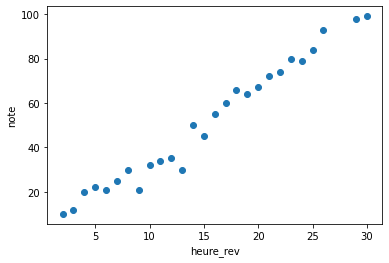

In [3]:
abscisse = list(data["heure_rev"])
ordonnee = list(data["note"])
plt.scatter(abscisse,ordonnee)
plt.xlabel('heure_rev')
plt.ylabel('note')

In [4]:
x = np.array(data["heure_rev"]).reshape(27,1)
y = np.array(data["note"]).reshape(27,1)
X = np.hstack((x, np.ones(x.shape)))
print("x shape : ",x.shape)
print("y shape : ",y.shape)
print("X shape : ",X.shape)

theta = np.random.randn(2,1)
print("theta shape : ",theta.shape)
print("theta : ",theta)

x shape :  (27, 1)
y shape :  (27, 1)
X shape :  (27, 2)
theta shape :  (2, 1)
theta :  [[ 1.22753643]
 [-0.66584997]]


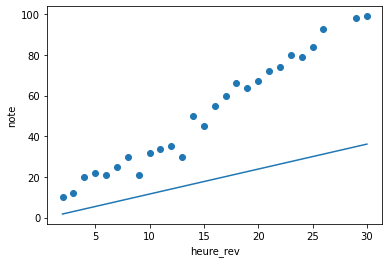

In [5]:
def model(X,theta):
    return X.dot(theta)

plt.scatter(x,y)
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.plot(x,model(X,theta))

In [6]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)
cost_function(X, y, theta)

702.2888442750983

In [7]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)
grad(X, y, theta)

array([[-638.12836514],
       [ -33.10798333]])

In [8]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(0, iterations):
        theta = theta - learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
        

    return theta, cost_history

[[ 3.3904119 ]
 [-0.53292551]]


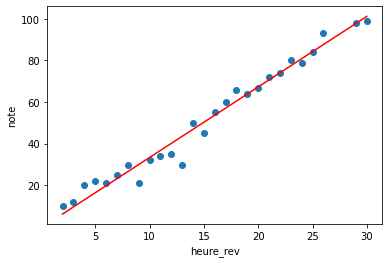

In [9]:
iterations = 100
learning_rate = 0.001

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print(theta_final)

predictions = model(X, theta_final)

plt.scatter(x,y)
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.plot(x, predictions, c='r')

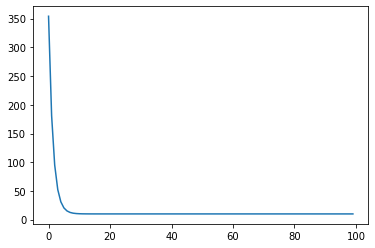

In [10]:
plt.plot(range(100), cost_history)

In [11]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y -y.mean())**2).sum()
    return 1 - u/v

In [12]:
coef_determination(y, predictions)

0.9730443281600634

In [13]:
mse = mean_squared_error(y, predictions)
print(mse)

19.9801060064606
